In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

rcParams = {'font.size': 20, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

def Breadth_of_Coverage(group):
    length = group.iloc[0]['SLen']
    cov = np.zeros(length)
    starts = group['SStart'].tolist()
    ends = group['SEnd'].tolist()
    for i in range(0, len(starts)):
        cov[starts[i]:ends[i]]=1
    return cov.sum()/length*100.0

def Load_PAF(filepath, filter_thresh = 90.0):
    lines = open(filepath).readlines()
    header = ['Query','Qlen','QStart','QEnd','Orientation','Subject','SLen',
              'SStart','SEnd','Matches','AlignLength','MAPQ']
    op = []
    for l in lines:
        l = l.split('\t')[:12]
        op.append(dict(zip(header, l)))
    df = pd.DataFrame(op)
    df[['Qlen','QStart','QEnd','SLen','SStart',
        'SEnd','Matches','AlignLength','MAPQ']] = df[['Qlen','QStart','QEnd','SLen','SStart',
                                                      'SEnd','Matches','AlignLength','MAPQ']].astype('int')
    df['PIdent'] = df['Matches']/df[['Qlen','SLen']].min(axis = 1)*100
    df = df[df['PIdent'] >= filter_thresh]
    df = df.loc[df.groupby(['Query'])['PIdent'].idxmax()]
    return df


In [2]:
data_path = '../../../../Mount/hotspring_metagenome/Synechococcus_paper_analysis/single_cell_assemblies/\
mapping_to_novel_contigs/'
files = listdir(data_path)
df_filtered_alignments = pd.DataFrame()
for f in files:
    if f.endswith(".paf"):
        df = Load_PAF(data_path+f, 90.0)
        if len(df) <= 0:
            continue
        df_stats = pd.DataFrame()
        df_stats['Breadth_Coverage'] = df.groupby('Subject').apply(Breadth_of_Coverage)
        df_stats['Avg-PIdent'] = df.groupby('Subject').mean()['PIdent']
        df_stats['Single_Cell_Sample'] = f.replace("_FD_mapped_to_novel.paf","")
        df_stats = df_stats.reset_index()
        df_filtered_alignments = df_filtered_alignments.append(df_stats, ignore_index = True)
        print(f)
df_filtered_alignments = df_filtered_alignments[df_filtered_alignments['Breadth_Coverage'] > 90]

UncmicORedA01F19_FD_mapped_to_novel.paf
UncmicMuRedA1J16_FD_mapped_to_novel.paf
UncmicOcRedA2J15_FD_mapped_to_novel.paf
UncmicMRedA02G13_2_FD_mapped_to_novel.paf
UncmicORedA02I19_FD_mapped_to_novel.paf
UncmicOcRedA3J13_FD_mapped_to_novel.paf
UncmicOcRedA01E9_FD_mapped_to_novel.paf
UncmicOcRedA1G20_FD_mapped_to_novel.paf
UncmicMuRedA1J19_FD_mapped_to_novel.paf
UncmicORedA02E13_FD_mapped_to_novel.paf
UncmicMRedA02H11_3_FD_mapped_to_novel.paf
UncmicOcRedA1K18_FD_mapped_to_novel.paf
UncmicOcRedA2H13_FD_mapped_to_novel.paf
UncmicOctRedA3M4_FD_mapped_to_novel.paf
UncmicORedA02G10_FD_mapped_to_novel.paf
UncmicMuRedA1E17_FD_mapped_to_novel.paf
UncmicMRedA02C21_FD_mapped_to_novel.paf
UncmicMuRedA1C10_FD_mapped_to_novel.paf
UncmicMusRedA1K7_FD_mapped_to_novel.paf
UncmicMuRedA1H19_FD_mapped_to_novel.paf
UncmicOcRedA3F18_FD_mapped_to_novel.paf
UncmicOctRedA3G3_FD_mapped_to_novel.paf
UncmicORedA02I10_FD_mapped_to_novel.paf
UncmicMRedA02K11_FD_mapped_to_novel.paf
UncmicMuRedA1I18_FD_mapped_to_novel.

UncmicMRedA02I19_2_FD_mapped_to_novel.paf
UncmicMusRedA1D4_FD_mapped_to_novel.paf
UncmicMRedA02I11_2_FD_mapped_to_novel.paf
UncmicMRedA02J17_2_FD_mapped_to_novel.paf
UncmicMuRedA02K8_FD_mapped_to_novel.paf
UncmicOcRedA3L14_FD_mapped_to_novel.paf
UncmicORedA02D10_FD_mapped_to_novel.paf
UncmicOctRedA3I8_FD_mapped_to_novel.paf
UncmicMRedA02D14_2_FD_mapped_to_novel.paf
UncmicOcRedA3H16_FD_mapped_to_novel.paf
UncmicMRedA02M11_3_FD_mapped_to_novel.paf
UncmicOcRedA3F21_FD_mapped_to_novel.paf
UncmicMuRedA02L7_2_FD_mapped_to_novel.paf
UncmicORedA02H18_FD_mapped_to_novel.paf
UncmicMusRedA1J6_FD_mapped_to_novel.paf
UncmicMuRedA1N18_FD_mapped_to_novel.paf
UncmicORedA01E14_FD_mapped_to_novel.paf
UncmicMusRedA1D3_2_FD_mapped_to_novel.paf
UncmicMuRedA1E18_FD_mapped_to_novel.paf
UncmicOcRedA3H10_FD_mapped_to_novel.paf
UncmicOcRedA2D21_FD_mapped_to_novel.paf
UncmicORedA01F18_FD_mapped_to_novel.paf
UncmicMRedA02I15_FD_mapped_to_novel.paf
UncmicORedA01H21_FD_mapped_to_novel.paf
UncmicOcRedA01L8_FD_mapped

In [3]:
df_grp = df_filtered_alignments.groupby('Subject').count()[['Single_Cell_Sample']]

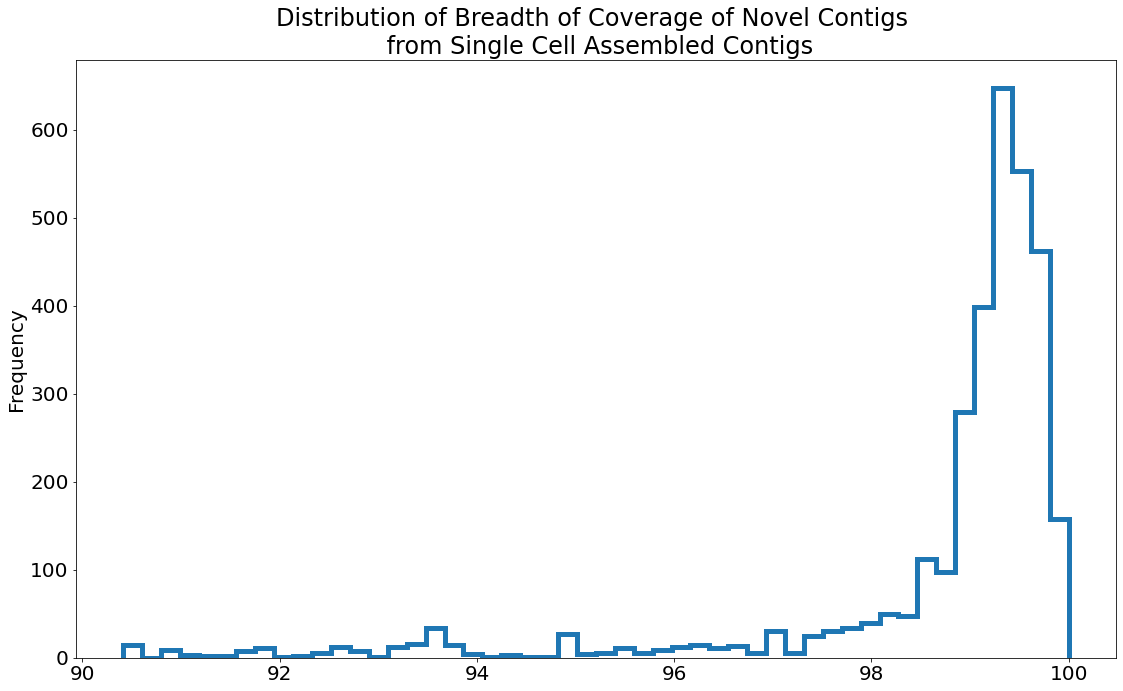

In [4]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,1,figsize = (16,10))
df_filtered_alignments[['Breadth_Coverage']].plot(kind = 'hist', bins = 50, ax = ax, histtype='step',
                                                  linewidth=5, legend = False)
ax.set_title('Distribution of Breadth of Coverage of Novel Contigs \n from Single Cell Assembled Contigs')
fig.tight_layout()
fig.savefig('../../../Plots/Hot_Spring_Plots/Synechococcus-Paper/Novel_Contigs_in_Single_Cell.pdf')